<a href="https://colab.research.google.com/github/JosephBaquerizo/dataset_turbina_jacket/blob/main/Histogramas_Datos_VF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogramas de los Datos

Este notebook tiene como objetivo realizar varios histogramas sobre los datos presentados por los sensores que captaron diferentes señales al momento de realizar pruebas experimentales con la turbina eólica de tipo jacket.

De esta forma se podrá visualizar las distribuciones que poseen estos datos en distintos escenarios.

## Importaciones

In [1]:
from google.colab import drive
from os import listdir
from os.path import isfile, join
from scipy.io import loadmat 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

## Obtener datos

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset_datos_dir = 'drive/MyDrive/DATOS_EXPERIMENTALES_JACKET/DATOS'
dataset_images_dir = 'drive/MyDrive/DATOS_EXPERIMENTALES_JACKET/IMAGES_FOLDER'

dataset_datos_files = [dataset_datos_dir+'/'+filename for filename in listdir(dataset_datos_dir) if isfile(join(dataset_datos_dir, filename))]

dataset_datos_files[0]

'drive/MyDrive/DATOS_EXPERIMENTALES_JACKET/DATOS/1_1_05A.mat'

In [4]:
datos_wn_05 = []
datos_wn_1 = []
datos_wn_2 = []
datos_wn_3 = []

for filename in listdir(dataset_datos_dir):
  if isfile(join(dataset_datos_dir, filename)):
    nombre_archivo = filename.split('.')[0]
    if (nombre_archivo.split('_')[2] == '05A'):
      datos_wn_05.append(dataset_datos_dir + '/' + filename)
    elif (nombre_archivo.split('_')[2] == '1A'):
      datos_wn_1.append(dataset_datos_dir + '/' + filename)
    elif (nombre_archivo.split('_')[2] == '2A'):
      datos_wn_2.append(dataset_datos_dir + '/' + filename)
    elif (nombre_archivo.split('_')[2] == '3A'):
      datos_wn_3.append(dataset_datos_dir + '/' + filename)

In [5]:
def separar_por_estado(arreglo):

  estado_1 = []
  estado_2 = []
  estado_3 = []
  estado_4 = []

  for direccion in arreglo:
    nombre_archivo = direccion.split('/')[4].split('.')[0]
    estado = nombre_archivo.split('_')[0]
    if (estado == '1'):
      estado_1.append(direccion)
    elif (estado == '2'):
      estado_2.append(direccion)
    elif (estado == '3'):
      estado_3.append(direccion)
    elif (estado == '4'):
      estado_4.append(direccion)

  return {1: estado_1, 2: estado_2, 3: estado_3, 4: estado_4}

In [6]:
datos_wn_05_estados = separar_por_estado(datos_wn_05)
datos_wn_1_estados = separar_por_estado(datos_wn_1)
datos_wn_2_estados = separar_por_estado(datos_wn_2)
datos_wn_3_estados = separar_por_estado(datos_wn_3)

diccionario_datos = {
                     'wn_05': datos_wn_05_estados,
                     'wn_1': datos_wn_1_estados,
                     'wn_2': datos_wn_2_estados,
                     'wn_3': datos_wn_3_estados 
                    }

In [7]:
indices_X = [0, 3, 6, 9, 12, 15, 18, 21]
indices_Y = [1, 4, 7, 10, 13, 16, 19, 22]
indices_Z = [2, 5, 8, 11, 14, 17, 20, 23]

## Histogramas

Establemos el tipo de escritura que van a poseer las gráficas. 

In [24]:
font_title = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 16,
          }

font_label = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 12,
          }

Creamos función que estructure los datos de tal forma que puedan ser graficados por la función de los histogramas individuales.

In [9]:
def configurar_datos_histograma_individual(conjunto_wn):
  
  """
  Función que retorna un conjunto de datos modificado, en donde se obtienen
  los promedios de todos los conjuntos asociados a cierto nivel de wn y el
  estado que representan.

  Retorna un conjunto de 4 arreglos relacionados con los 4 estados existentes.
  """

  conjunto = []
  estados = conjunto_wn.keys()

  for estado in estados:
    cantidad = 0
    vector = 0
    arreglo = conjunto_wn[estado]
    for direccion in arreglo:
      mat = loadmat(direccion)
      df = pd.DataFrame(mat['data'])
      vector = vector + df.mean(axis=1)
      cantidad = cantidad + 1
    vector = vector / cantidad
    conjunto.append(vector)

  return conjunto

Creamos función para visualizar individualmente cada conjunto de datos asociado por el nivel de White Noise.

In [10]:
def graficar_histograma_individual(conjunto, titulo, font_title, font_label):
  
  """
  Función que acepta un conjunto de datos de 4 arreglos para realizar una gráfica
  de 4 histogramas superpuestos.
  """

  plt.figure(figsize=[9, 6])

  plt.hist(conjunto[0], bins=15, alpha=0.5, histtype='stepfilled', label='sin daños')
  plt.hist(conjunto[1], bins=15, alpha=0.5, histtype='stepfilled', label='réplica')
  plt.hist(conjunto[2], bins=15, alpha=0.5, histtype='stepfilled', label='fisura')
  plt.hist(conjunto[3], bins=15, alpha=0.5, histtype='stepfilled', label='perno flojo')
  plt.legend(loc='upper right')
  plt.title(label=titulo, fontdict=font_title)
  plt.xlabel('señales de sensores', fontdict=font_label)

  plt.show()

Asignamos cada conjunto de datos obtenido de la función creada previamente a sus respectivas variables.

In [11]:
wn05_configurado_hist_ind = configurar_datos_histograma_individual(diccionario_datos['wn_05'])
wn1_configurado_hist_ind = configurar_datos_histograma_individual(diccionario_datos['wn_1'])
wn2_configurado_hist_ind = configurar_datos_histograma_individual(diccionario_datos['wn_2'])
wn3_configurado_hist_ind = configurar_datos_histograma_individual(diccionario_datos['wn_3'])

Graficamos un histograma de los datos asociados con un nivel de White Noise diferenciados por sus estados.

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


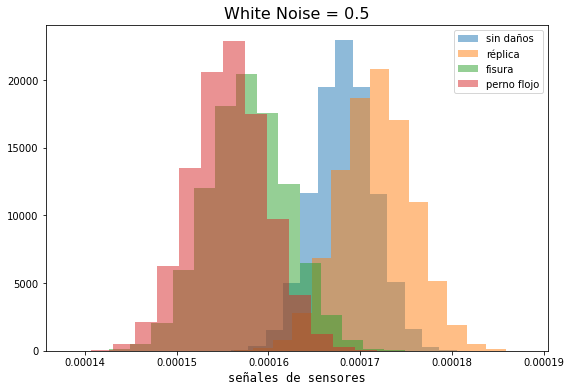

In [12]:
graficar_histograma_individual(conjunto=wn05_configurado_hist_ind, 
                               titulo='White Noise = 0.5',
                               font_title=font_title,
                               font_label=font_label)

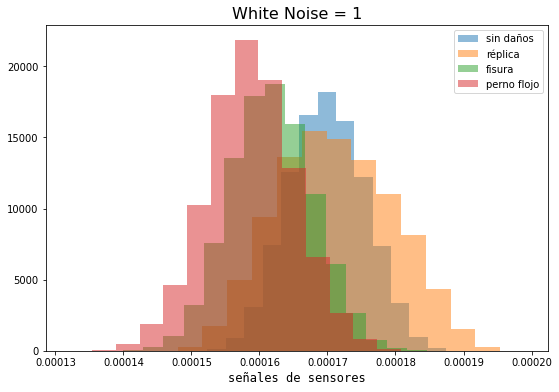

In [13]:
graficar_histograma_individual(conjunto=wn1_configurado_hist_ind, 
                               titulo='White Noise = 1',
                               font_title=font_title,
                               font_label=font_label)

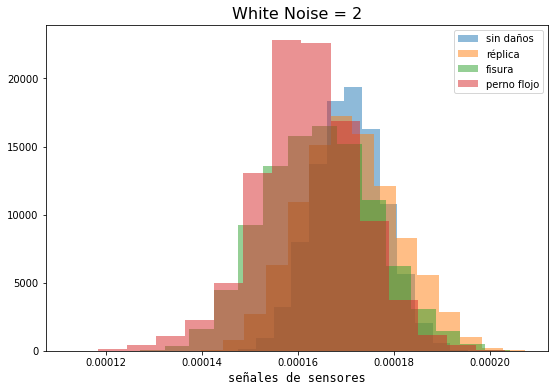

In [14]:
graficar_histograma_individual(conjunto=wn2_configurado_hist_ind, 
                               titulo='White Noise = 2',
                               font_title=font_title,
                               font_label=font_label)

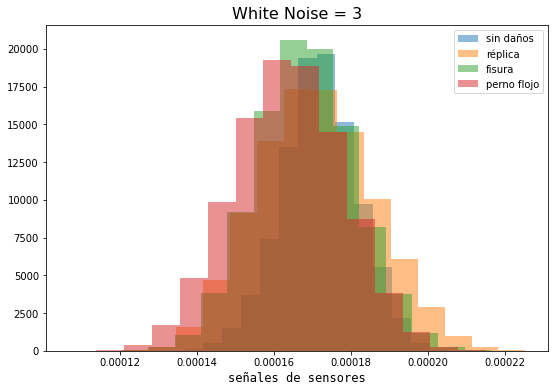

In [15]:
graficar_histograma_individual(conjunto=wn3_configurado_hist_ind, 
                               titulo='White Noise = 3',
                               font_title=font_title,
                               font_label=font_label)

Aplicamos la lógica de la función para poder visualizar los 4 gráficos (White Noise de 0.5, 1, 2, 3) en una sola imagen.

In [16]:
def configurar_datos_histograma_grupal(conjunto, label, font_title):

  """
  Función que modifica un conjunto de datos para poder representarlos
  en 4 subplots con una mejor visualización.
  """
  
  plt.hist(conjunto[0], bins=15, alpha=0.5, histtype='stepfilled')
  plt.hist(conjunto[1], bins=15, alpha=0.5, histtype='stepfilled')
  plt.hist(conjunto[2], bins=15, alpha=0.5, histtype='stepfilled')
  plt.hist(conjunto[3], bins=15, alpha=0.5, histtype='stepfilled')
  plt.title(label=label, fontname='Times New Roman', fontsize=16)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

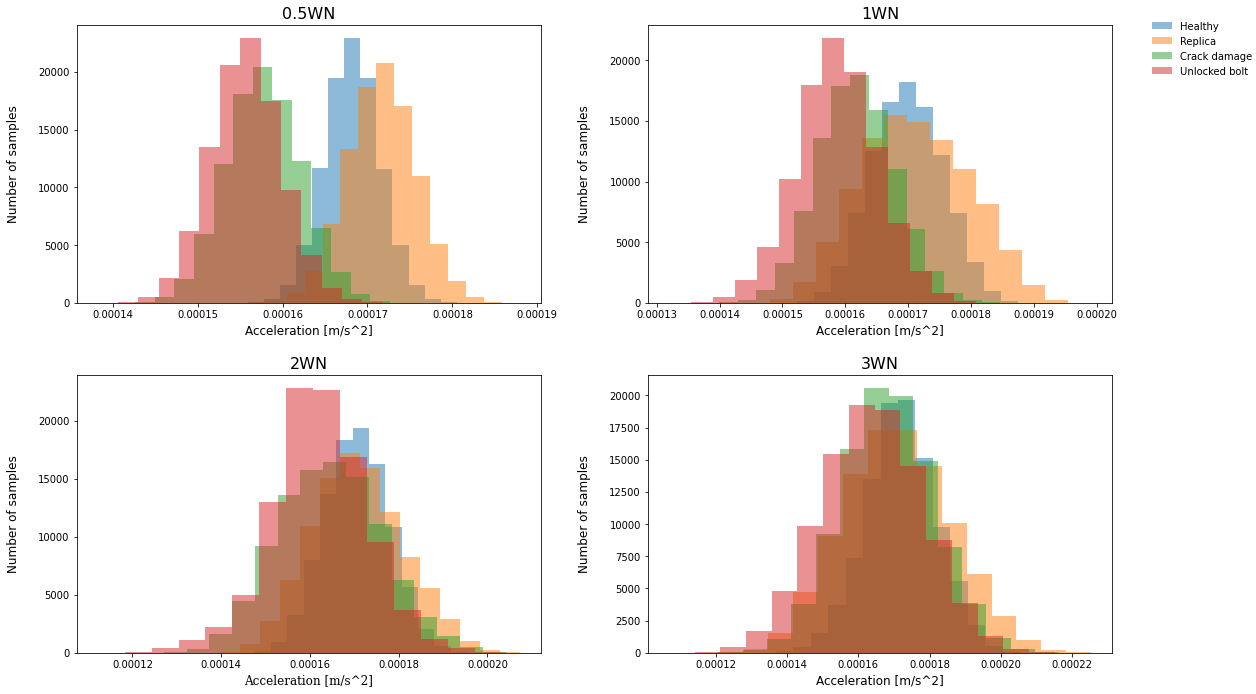

In [27]:
plt.figure(figsize=[16, 10])
#plt.suptitle('Distributions', fontdict=font_title, fontsize=20)
plt.subplot(2,2,1)
plt.hist(wn05_configurado_hist_ind[0], bins=15, alpha=0.5, histtype='stepfilled', label='Healthy')
plt.hist(wn05_configurado_hist_ind[1], bins=15, alpha=0.5, histtype='stepfilled', label='Replica')
plt.hist(wn05_configurado_hist_ind[2], bins=15, alpha=0.5, histtype='stepfilled', label='Crack damage')
plt.hist(wn05_configurado_hist_ind[3], bins=15, alpha=0.5, histtype='stepfilled', label='Unlocked bolt')
plt.title(label='0.5WN', fontname='Times New Roman', fontsize=16)
plt.xlabel('Acceleration [m/s^2]', fontname="Times New Roman", fontsize=12)
plt.ylabel('Number of samples', fontname="Times New Roman", labelpad=18, fontsize=12)

plt.subplot(2,2,2)
configurar_datos_histograma_grupal(conjunto=wn1_configurado_hist_ind,
                                   label='1WN',
                                   font_title=font_title)
plt.xlabel('Acceleration [m/s^2]', fontname="Times New Roman", fontsize=12)
plt.ylabel('Number of samples', fontname="Times New Roman", labelpad=18, fontsize=12)

plt.subplot(2,2,3)
configurar_datos_histograma_grupal(conjunto=wn2_configurado_hist_ind,
                                   label='2WN',
                                   font_title=font_title)
plt.xlabel('Acceleration [m/s^2]', fontdict=font_label)
plt.ylabel('Number of samples', fontname="Times New Roman", labelpad=18, fontsize=12)
#plt.xlabel('sensor´s signal', fontdict=font_label)

plt.subplot(2,2,4)
configurar_datos_histograma_grupal(conjunto=wn3_configurado_hist_ind,
                                   label='3WN',
                                   font_title=font_title)
plt.xlabel('Acceleration [m/s^2]', fontname="Times New Roman", fontsize=12)
plt.ylabel('Number of samples', fontname="Times New Roman", labelpad=18, fontsize=12)
plt.figlegend(loc='upper right', bbox_to_anchor=(1.1, 0.955), frameon=False, borderpad=1)
# plt.xlabel('sensor´s signal', fontdict=font_label)
plt.tight_layout(pad=2)
plt.savefig('histogramas_eps_vf_2.eps')

In [18]:
plt.savefig('histogramas_eps_vf.eps')

<Figure size 432x288 with 0 Axes>

In [19]:
plt.savefig('histogramas_eps_vf')

<Figure size 432x288 with 0 Axes>

In [ ]:
def configurar_datos_XYZ(conjunto_wn,
                         estado_n,
                         indices_X,
                         indices_Y,
                         indices_Z):
  
  """
  Función que retorna un conjunto con arreglos del promedio de los vectores
  X, Y, Z de los sensores asociados a un nivel de wn y a un estado en específico.
  """

  conjunto = []
  estados = conjunto_wn.keys()

  conjunto_XYZ = []

  for estado in estados:
    matriz = 0
    cantidad = 0
    arreglo = conjunto_wn[estado]
    for direccion in arreglo:
      mat = loadmat(direccion)
      df = pd.DataFrame(mat['data'])
      matriz = matriz + df
      cantidad = cantidad + 1
    matriz = matriz/cantidad
    conjunto.append(matriz)
  
  conjunto_X = conjunto[estado_n-1][indices_X].mean(axis=1)
  conjunto_Y = conjunto[estado_n-1][indices_Y].mean(axis=1)
  conjunto_Z = conjunto[estado_n-1][indices_Z].mean(axis=1)

  conjunto_XYZ.append(conjunto_X)
  conjunto_XYZ.append(conjunto_Y)
  conjunto_XYZ.append(conjunto_Z)

  return conjunto_XYZ

In [ ]:
def graficar_histograma_XYZ(conjunto, titulo, font_title, font_label):

  """
  Función que grafica 3 histogramas superpuestos relacionados a un 
  conjunto de datos de 3 arreglos. 
  """

  plt.hist(conjunto[0], bins=15, alpha=0.5, histtype='stepfilled')
  plt.hist(conjunto[1], bins=15, alpha=0.5, histtype='stepfilled')
  plt.hist(conjunto[2], bins=15, alpha=0.5, histtype='stepfilled')
  plt.title(label=titulo, fontdict=font_title)

In [ ]:
wn05_XYZ_1 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_05'],
                                estado_n=1,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn05_XYZ_2 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_05'],
                                estado_n=2,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn05_XYZ_3 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_05'],
                                estado_n=3,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn05_XYZ_4 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_05'],
                                estado_n=4,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)

Text(0.5, 0, 'señal de sensores')

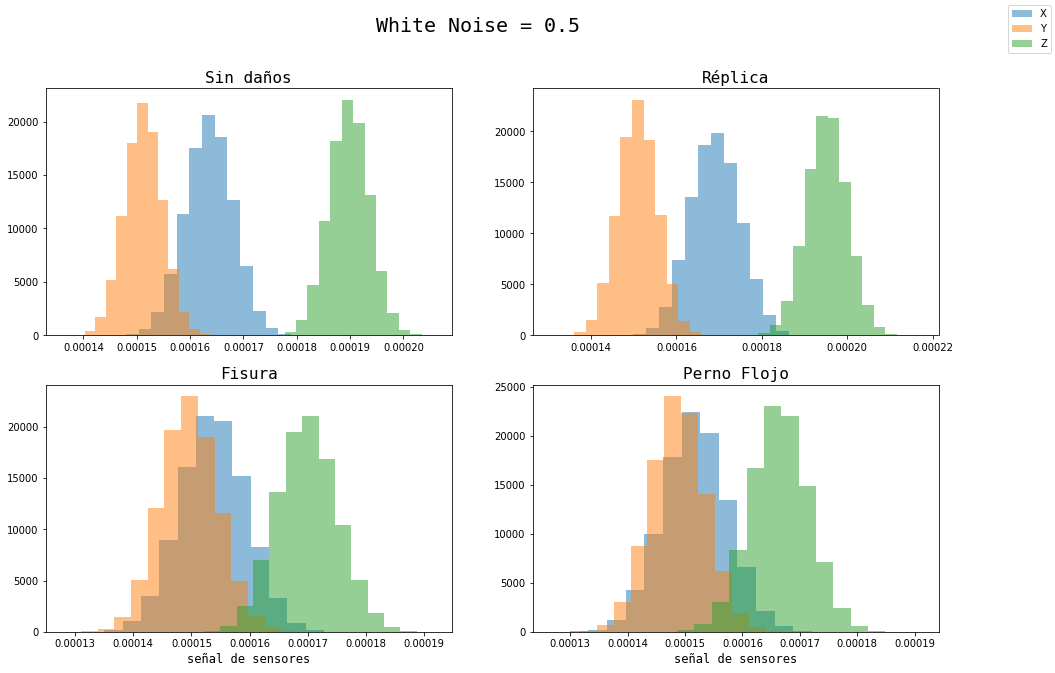

In [ ]:
plt.figure(figsize=[16, 10])
plt.suptitle('White Noise = 0.5', fontdict=font_title, fontsize=20)
plt.tight_layout(pad=5)
plt.subplot(2,2,1)
plt.hist(wn05_XYZ_1[0], bins=15, alpha=0.5, histtype='stepfilled', label='X')
plt.hist(wn05_XYZ_1[1], bins=15, alpha=0.5, histtype='stepfilled', label='Y')
plt.hist(wn05_XYZ_1[2], bins=15, alpha=0.5, histtype='stepfilled', label='Z')
plt.title(label='Sin daños', fontdict=font_title)
plt.subplot(2,2,2)
graficar_histograma_XYZ(conjunto=wn05_XYZ_2,
                        titulo='Réplica',
                        font_title=font_title,
                        font_label=font_label)
plt.subplot(2,2,3)
graficar_histograma_XYZ(conjunto=wn05_XYZ_3,
                        titulo='Fisura',
                        font_title=font_title,
                        font_label=font_label)
plt.xlabel('señal de sensores', fontdict=font_label)
plt.subplot(2,2,4)
graficar_histograma_XYZ(conjunto=wn05_XYZ_4,
                        titulo='Perno Flojo',
                        font_title=font_title,
                        font_label=font_label)
plt.figlegend(loc='upper right')
plt.xlabel('señal de sensores', fontdict=font_label)

In [ ]:
wn1_XYZ_1 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_1'],
                                estado_n=1,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn1_XYZ_2 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_1'],
                                estado_n=2,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn1_XYZ_3 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_1'],
                                estado_n=3,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn1_XYZ_4 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_1'],
                                estado_n=4,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)

Text(0.5, 0, 'señal de sensores')

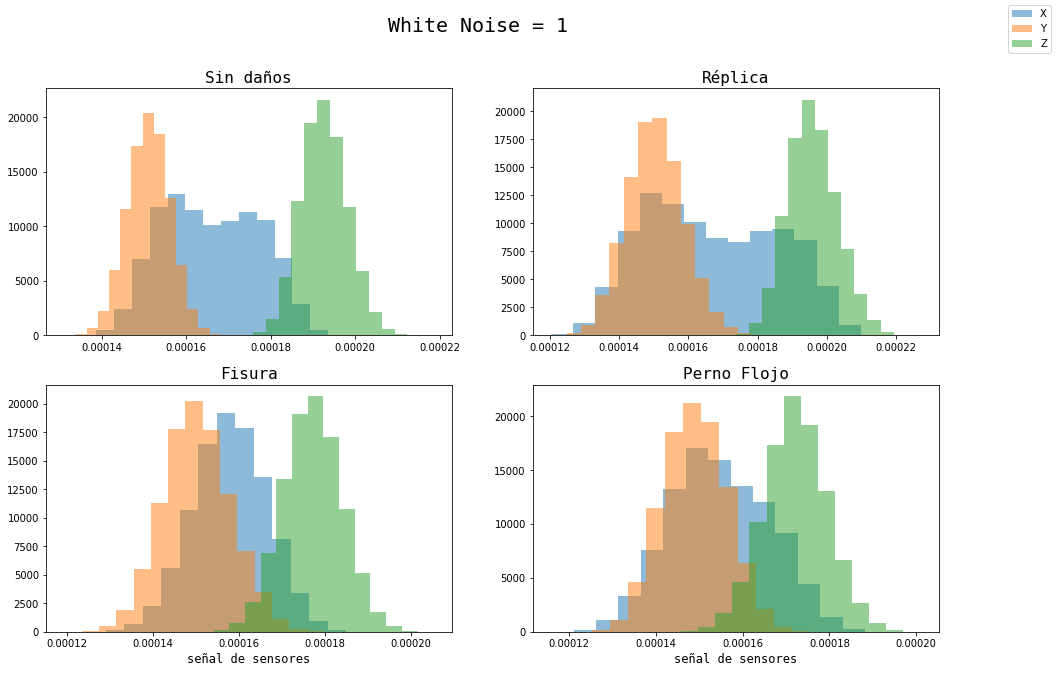

In [ ]:
plt.figure(figsize=[16, 10])
plt.suptitle('White Noise = 1', fontdict=font_title, fontsize=20)
plt.tight_layout(pad=5)
plt.subplot(2,2,1)
plt.hist(wn1_XYZ_1[0], bins=15, alpha=0.5, histtype='stepfilled', label='X')
plt.hist(wn1_XYZ_1[1], bins=15, alpha=0.5, histtype='stepfilled', label='Y')
plt.hist(wn1_XYZ_1[2], bins=15, alpha=0.5, histtype='stepfilled', label='Z')
plt.title(label='Sin daños', fontdict=font_title)
plt.subplot(2,2,2)
graficar_histograma_XYZ(conjunto=wn1_XYZ_2,
                        titulo='Réplica',
                        font_title=font_title,
                        font_label=font_label)
plt.subplot(2,2,3)
graficar_histograma_XYZ(conjunto=wn1_XYZ_3,
                        titulo='Fisura',
                        font_title=font_title,
                        font_label=font_label)
plt.xlabel('señal de sensores', fontdict=font_label)
plt.subplot(2,2,4)
graficar_histograma_XYZ(conjunto=wn1_XYZ_4,
                        titulo='Perno Flojo',
                        font_title=font_title,
                        font_label=font_label)
plt.figlegend(loc='upper right')
plt.xlabel('señal de sensores', fontdict=font_label)

In [ ]:
wn2_XYZ_1 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_2'],
                                estado_n=1,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn2_XYZ_2 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_2'],
                                estado_n=2,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn2_XYZ_3 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_2'],
                                estado_n=3,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn2_XYZ_4 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_2'],
                                estado_n=4,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)

Text(0.5, 0, 'señal de sensores')

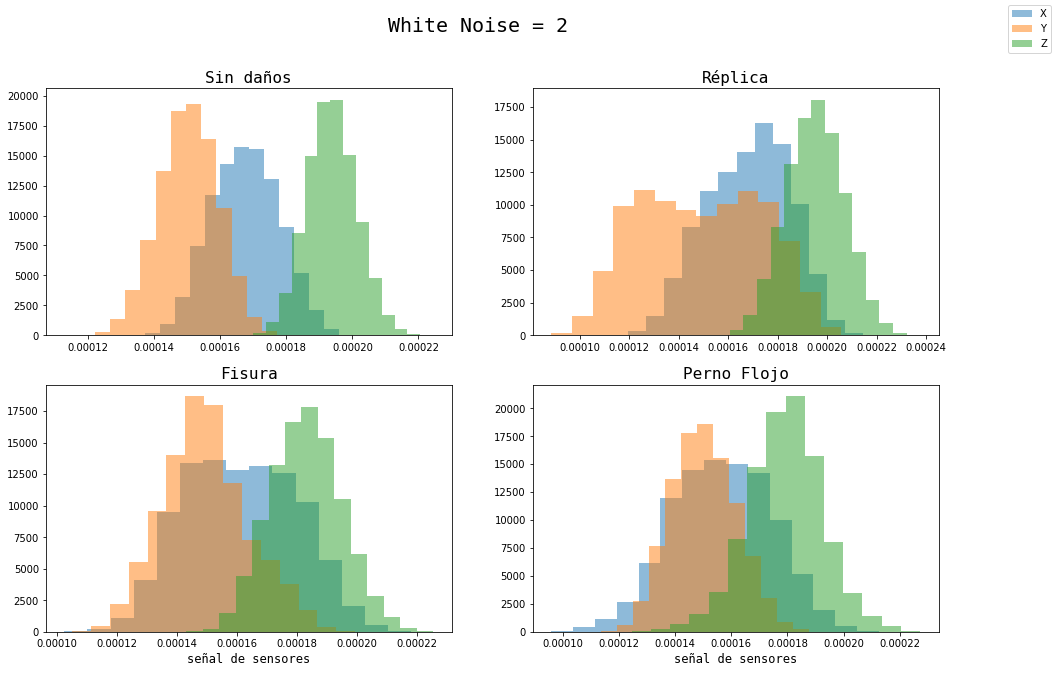

In [ ]:
plt.figure(figsize=[16, 10])
plt.suptitle('White Noise = 2', fontdict=font_title, fontsize=20)
plt.tight_layout(pad=5)
plt.subplot(2,2,1)
plt.hist(wn2_XYZ_1[0], bins=15, alpha=0.5, histtype='stepfilled', label='X')
plt.hist(wn2_XYZ_1[1], bins=15, alpha=0.5, histtype='stepfilled', label='Y')
plt.hist(wn2_XYZ_1[2], bins=15, alpha=0.5, histtype='stepfilled', label='Z')
plt.title(label='Sin daños', fontdict=font_title)
plt.subplot(2,2,2)
graficar_histograma_XYZ(conjunto=wn2_XYZ_2,
                        titulo='Réplica',
                        font_title=font_title,
                        font_label=font_label)
plt.subplot(2,2,3)
graficar_histograma_XYZ(conjunto=wn2_XYZ_3,
                        titulo='Fisura',
                        font_title=font_title,
                        font_label=font_label)
plt.xlabel('señal de sensores', fontdict=font_label)
plt.subplot(2,2,4)
graficar_histograma_XYZ(conjunto=wn2_XYZ_4,
                        titulo='Perno Flojo',
                        font_title=font_title,
                        font_label=font_label)
plt.figlegend(loc='upper right')
plt.xlabel('señal de sensores', fontdict=font_label)

In [ ]:
wn3_XYZ_1 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_3'],
                                estado_n=1,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn3_XYZ_2 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_3'],
                                estado_n=2,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn3_XYZ_3 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_3'],
                                estado_n=3,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)
wn3_XYZ_4 = configurar_datos_XYZ(conjunto_wn=diccionario_datos['wn_3'],
                                estado_n=4,
                                indices_X=indices_X,
                                indices_Y=indices_Y,
                                indices_Z=indices_Z)

Text(0.5, 0, 'señal de sensores')

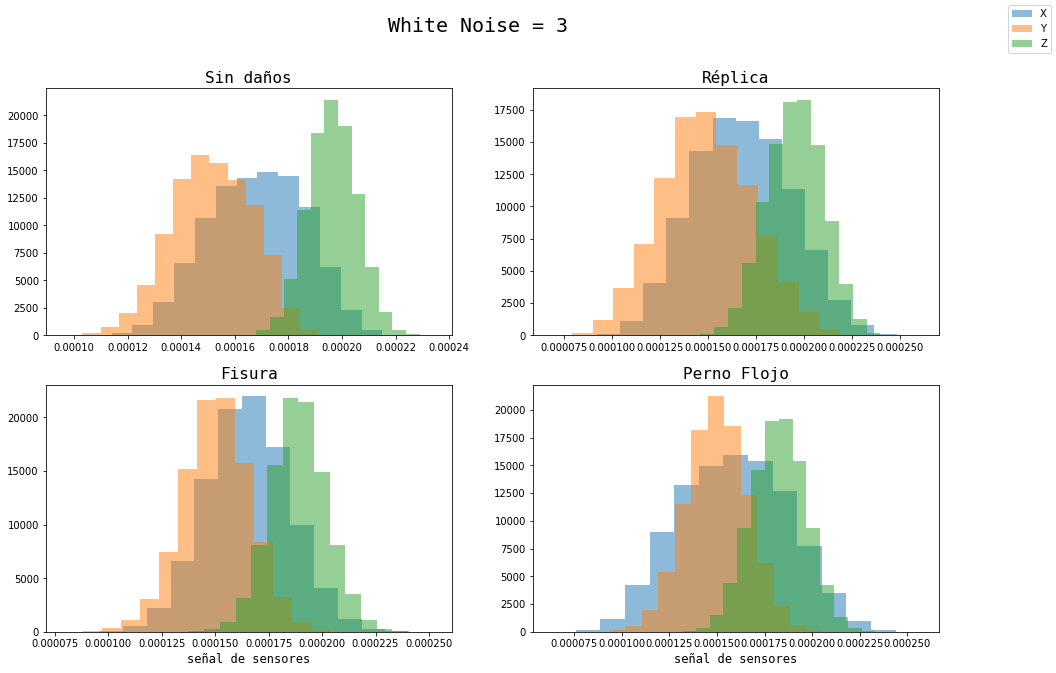

In [ ]:
plt.figure(figsize=[16, 10])
plt.suptitle('White Noise = 3', fontdict=font_title, fontsize=20)
plt.tight_layout(pad=5)
plt.subplot(2,2,1)
plt.hist(wn3_XYZ_1[0], bins=15, alpha=0.5, histtype='stepfilled', label='X')
plt.hist(wn3_XYZ_1[1], bins=15, alpha=0.5, histtype='stepfilled', label='Y')
plt.hist(wn3_XYZ_1[2], bins=15, alpha=0.5, histtype='stepfilled', label='Z')
plt.title(label='Sin daños', fontdict=font_title)
plt.subplot(2,2,2)
graficar_histograma_XYZ(conjunto=wn3_XYZ_2,
                        titulo='Réplica',
                        font_title=font_title,
                        font_label=font_label)
plt.subplot(2,2,3)
graficar_histograma_XYZ(conjunto=wn3_XYZ_3,
                        titulo='Fisura',
                        font_title=font_title,
                        font_label=font_label)
plt.xlabel('señal de sensores', fontdict=font_label)
plt.subplot(2,2,4)
graficar_histograma_XYZ(conjunto=wn3_XYZ_4,
                        titulo='Perno Flojo',
                        font_title=font_title,
                        font_label=font_label)
plt.figlegend(loc='upper right')
plt.xlabel('señal de sensores', fontdict=font_label)